In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

print('setup completed')

setup completed


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/spotify_top_1000_tracks.csv'

df = pd.read_csv(file_path)
print('df imported')

df imported


In [ ]:
df.head(5)

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')
df['year'] = df['release_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_name    1000 non-null   object        
 1   artist        1000 non-null   object        
 2   album         1000 non-null   object        
 3   release_date  977 non-null    datetime64[ns]
 4   popularity    1000 non-null   int64         
 5   spotify_url   1000 non-null   object        
 6   id            1000 non-null   object        
 7   duration_min  1000 non-null   float64       
 8   year          977 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.4+ KB


In [ ]:
df = df.dropna().reset_index(drop = True)

In [ ]:
df['year']= df['year'].astype(int)

In [ ]:
df['duration_min'] = df['duration_min'].round(1)
df.head(3)

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min,year
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.9,2018
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.8,2016
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.2,2019


In [ ]:
df['weekday'] = df['release_date'].dt.day_name()
df['month'] = df['release_date']. dt.month

In [ ]:
df.head()

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min,year,weekday,month
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.9,2018,Friday,2
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.8,2016,Friday,11
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.2,2019,Friday,6
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,4.0,2020,Friday,8
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.4,2016,Friday,8


In [ ]:
df = df.sort_values(by = 'popularity', ascending = False).reset_index(drop = True)

In [ ]:
for col in df.columns:
  print(f'Unique Values from {col}: {df[col].unique()}/n')

Unique Values from track_name: ['That’s So True' 'APT.' 'All The Stars (with SZA)' 'I Wanna Be Yours'
 'One Of The Girls (with JENNIE, Lily Rose Depp)' 'Yellow'
 'Sweater Weather' 'Show Me Love' 'blue' 'Espresso' 'Starboy'
 'End of Beginning' 'CHIHIRO' 'Perfect' 'Shape of You' 'Blinding Lights'
 'Cruel Summer' 'lovely (with Khalid)' 'Night Changes' 'Without Me'
 'As It Was' 'Just the Way You Are' 'Closer' 'Beautiful Things'
 'Counting Stars' "There's Nothing Holdin' Me Back" "I'm Good (Blue)"
 'Bring Me To Life' 'Believer' 'Young And Beautiful' 'Photograph'
 "Hips Don't Lie (feat. Wyclef Jean)" 'Circles'
 'I Adore You (feat. Daecolm)' 'Story of My Life' 'Anxiety'
 'Someone You Loved' 'Let Me Love You' 'Heat Waves' 'Pumped Up Kicks'
 'Softcore' 'The Hills' 'Ransom' 'Save Your Tears' 'Mockingbird'
 'Nonsense' 'The Color Violet' 'Please Please Please' 'Sundress'
 'Passionfruit' "Don't" 'Sorry' 'Lover' 'Thunder' 'Say Yes To Heaven'
 'HIGHEST IN THE ROOM' 'The Nights' "Stumblin' In" 'Paypho

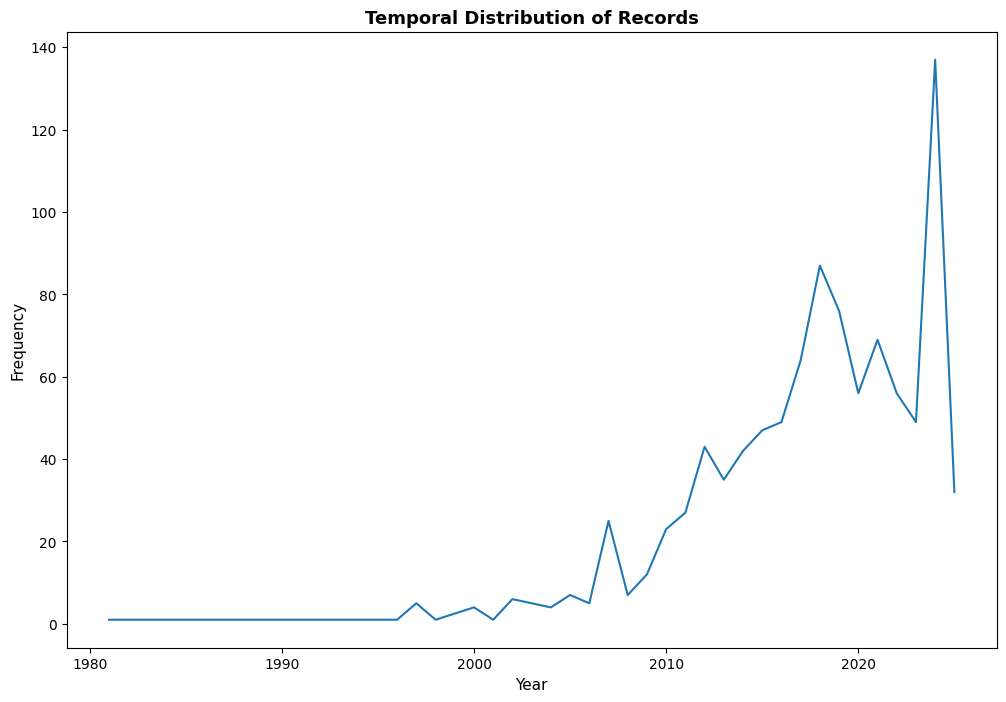

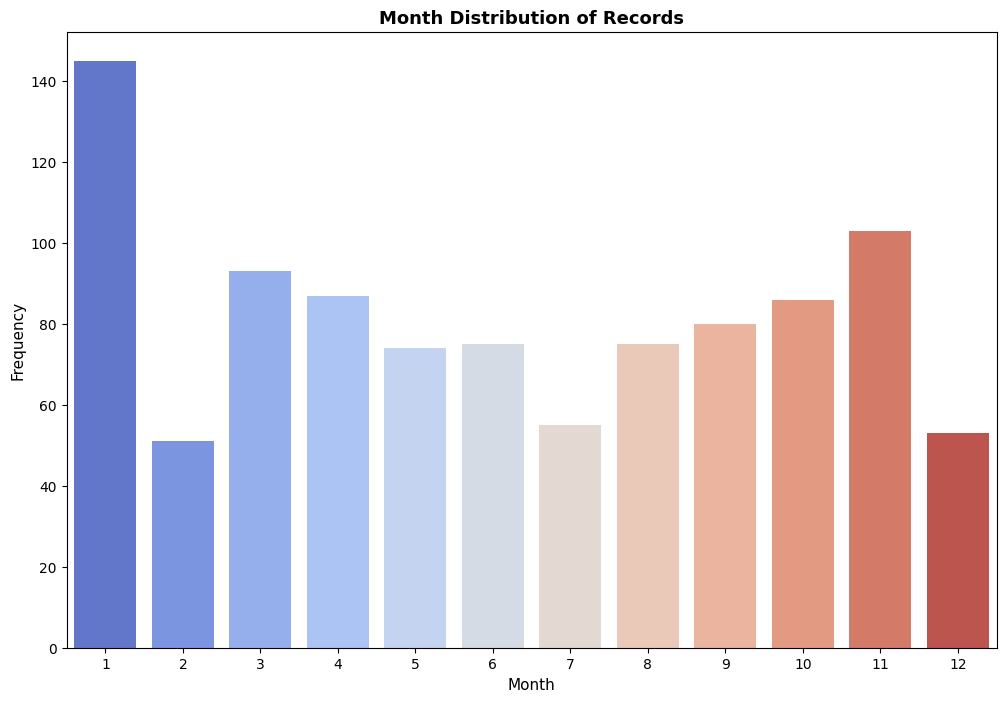

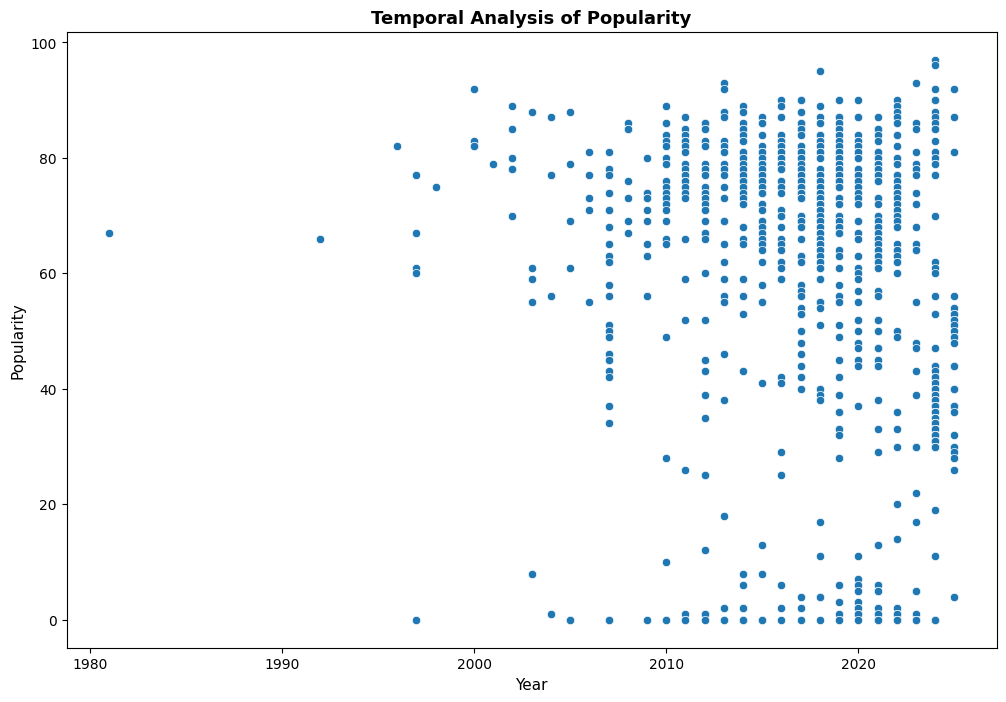

In [ ]:
plt.figure(figsize=(12,8))
model_count = df['year'].value_counts()
sns.lineplot(
    x = model_count.index,
    y = model_count.values,
    palette = 'coolwarm'
)
plt.title('Temporal Distribution of Records', size = 13, fontweight = 'bold')
plt.ylabel('Frequency', size = 11)
plt.xlabel('Year', size = 11)
plt.show()

#
plt.figure(figsize=(12,8))
model_count1 = df['month'].value_counts()
sns.barplot(
    x = model_count1.index,
    y = model_count1.values,
    palette = 'coolwarm'
)
plt.title('Month Distribution of Records', size = 13, fontweight = 'bold')
plt.ylabel('Frequency', size =11)
plt.xlabel('Month', size = 11)
plt.show()

#
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df,
    x = 'year',
    y = 'popularity',
    palette = 'coolwarm'
)
plt.title('Temporal Analysis of Popularity', size = 13, fontweight = 'bold')
plt.ylabel('Popularity', size =11)
plt.xlabel('Year', size = 11)
plt.show()

Number of Artists in the top 1000: 511


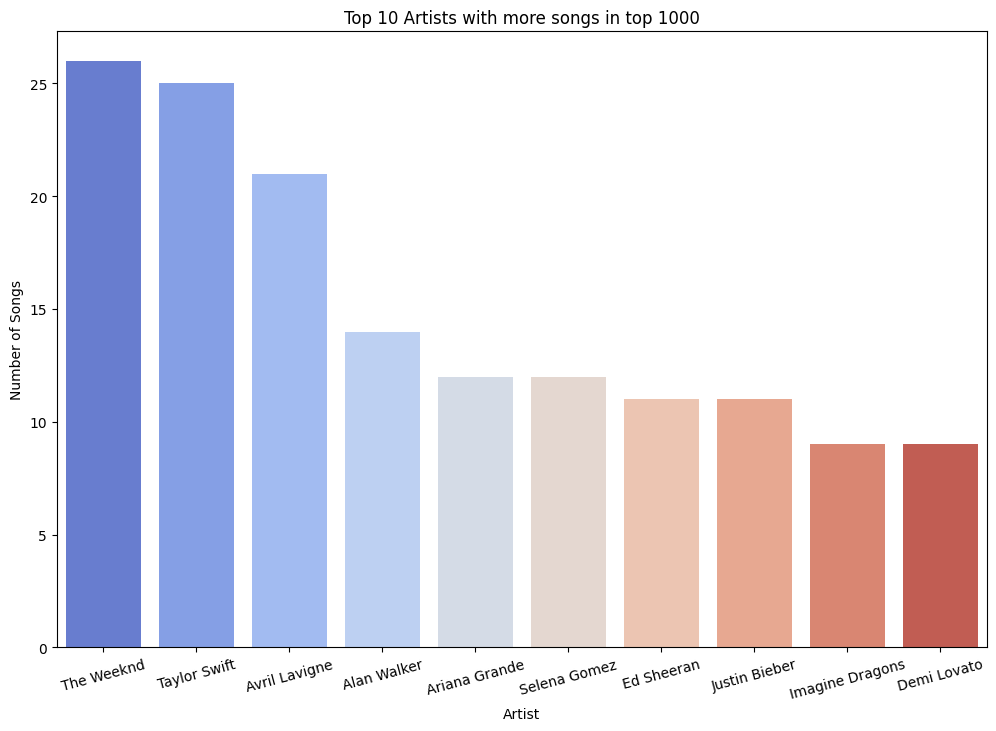

In [ ]:
print(f'Number of Artists in the top 1000:', df['artist'].nunique())

plt.figure(figsize=(12,8))
model_count2 = df['artist'].value_counts().nlargest(10)
sns.barplot(
    x = model_count2.index,
    y = model_count2.values,
    palette = 'coolwarm'
)
plt.title('Top 10 Artists with more songs in top 1000')
plt.ylabel('Number of Songs')
plt.xlabel('Artist')
plt.xticks(rotation=15)
plt.show()

Number of Artists in the top 1000: 799


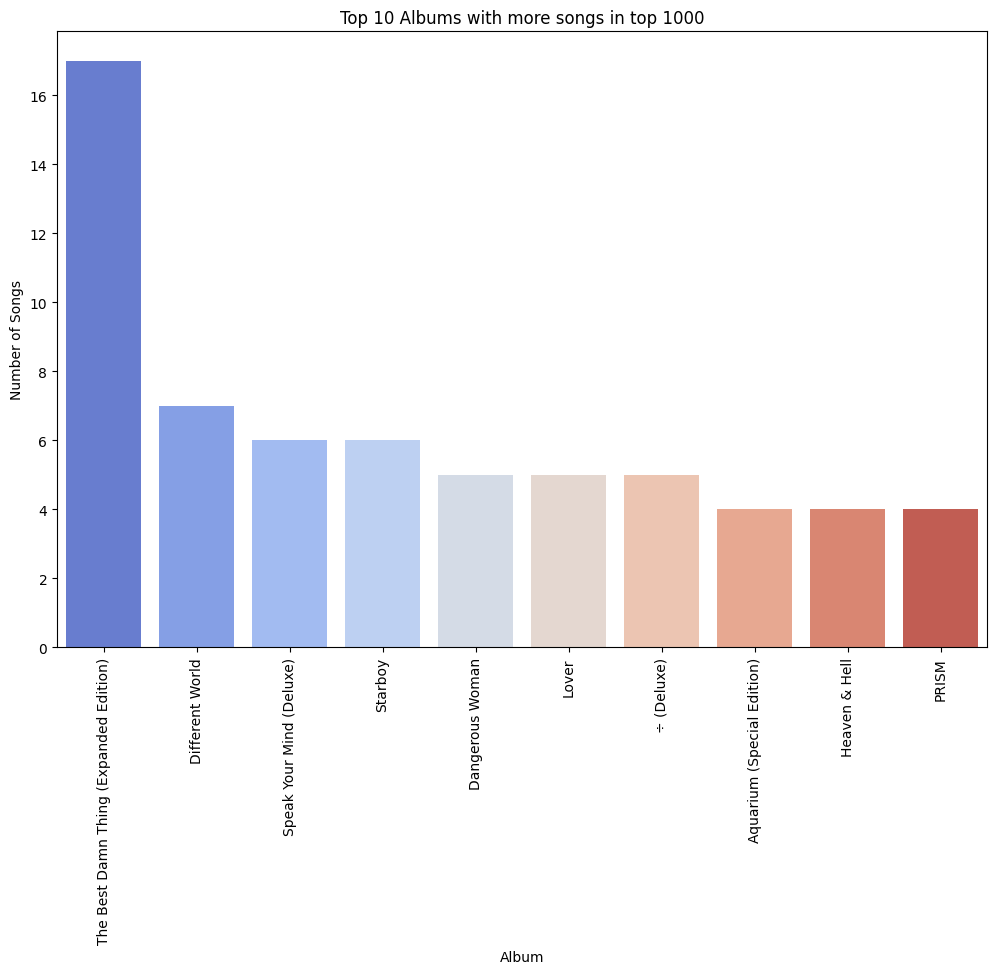

In [ ]:
print(f'Number of Artists in the top 1000:', df['album'].nunique())

plt.figure(figsize=(12,8))
model_count3 = df['album'].value_counts().nlargest(10)
sns.barplot(
    x = model_count3.index,
    y = model_count3.values,
    palette = 'coolwarm'
)
plt.title('Top 10 Albums with more songs in top 1000')
plt.ylabel('Number of Songs')
plt.xlabel('Album')
plt.xticks(rotation=90)
plt.show()

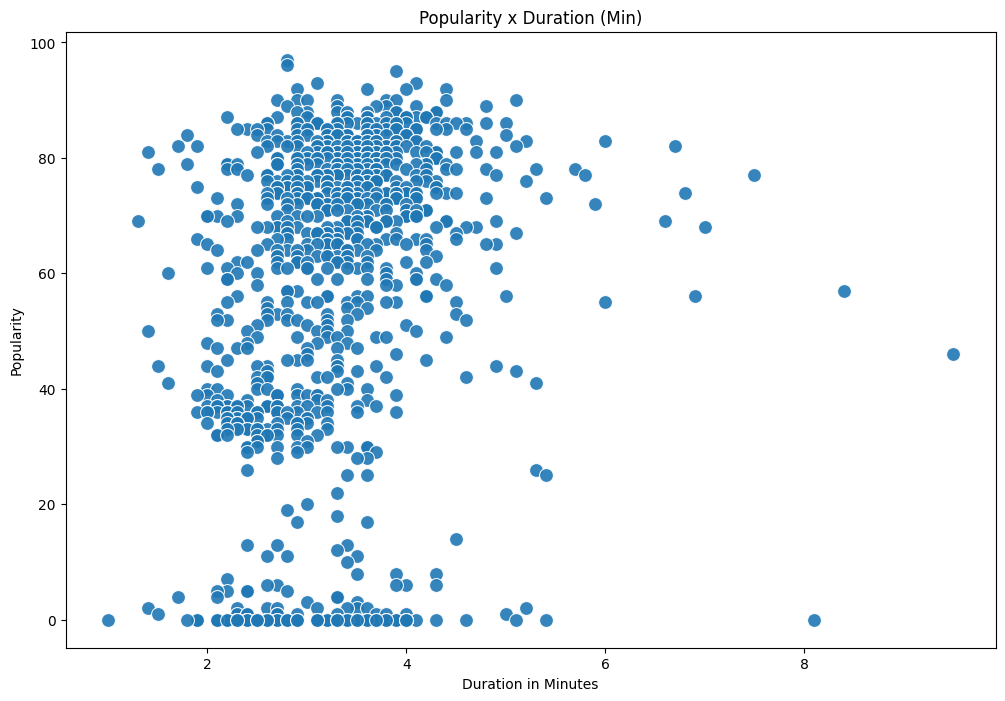

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df,
    x = 'duration_min',
    y = 'popularity',
    palette = 'coolwarm',
    s=100,
    alpha=0.9
)
plt.title('Popularity x Duration (Min)')
plt.xlabel('Duration in Minutes')
plt.ylabel('Popularity')
plt.show()

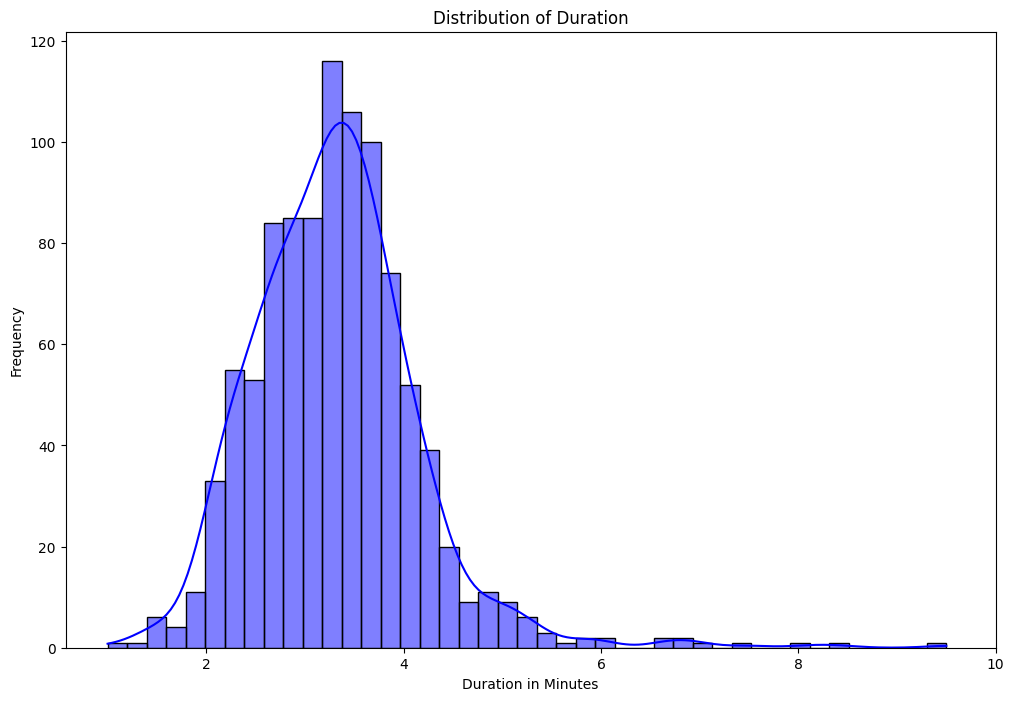

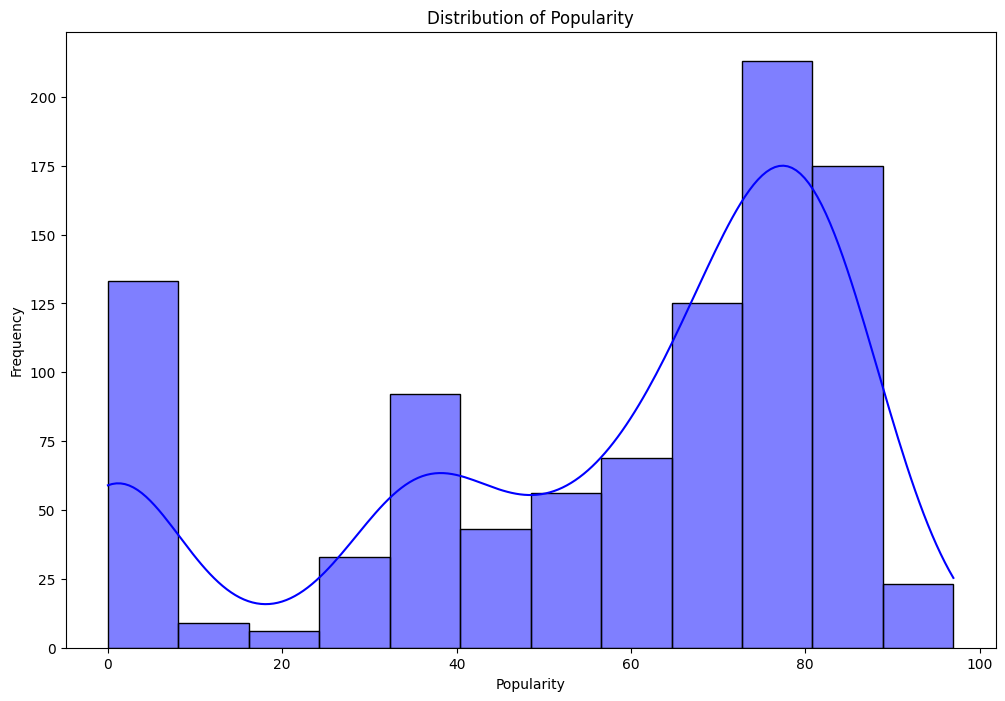

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(
    x = df['duration_min'],
    kde= True,
    color = 'blue'
)
plt.xticks([2,4,6,8,10])
plt.title('Distribution of Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,8))
sns.histplot(
    x = df['popularity'],
    kde= True,
    color = 'blue'
)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

#The End